In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from matplotlib.patches import Circle
import cv2

from place_me import run, run_v2

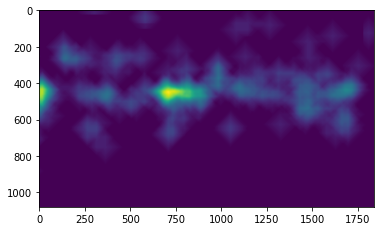

In [2]:
data = np.loadtxt('data/heatmap.txt')
data[data > 2000] = 2000 
data = data / data.max()
data = data[:, 2000:]
# data = cv2.equalizeHist(data)
plt.imshow(data);

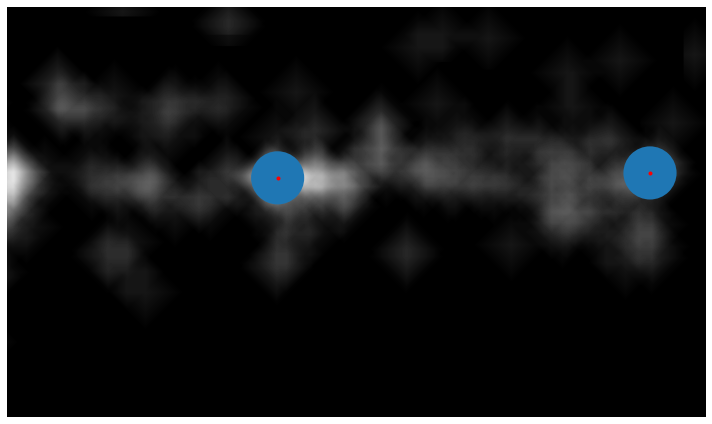

In [12]:
image_max = ndi.maximum_filter(data, size=20, mode='constant')

coordinates = peak_local_max(data, min_distance=140, num_peaks=2)

fig, ax = plt.subplots(figsize=(10, 9))

ax.imshow(data, cmap=plt.cm.gray)
ax.autoscale(False)
ax.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax.axis('off')

for y, x in coordinates:
    circ = Circle((x, y), 70)
    ax.add_patch(circ)

fig.tight_layout()

plt.show()

In [13]:
%%time
%env RUST_PRINT=1

arr = np.c_[coordinates, 100 * np.ones(coordinates.shape[0])]
options = {
    'width': data.shape[1],
    'height': data.shape[0],
    'resolution': 2880,
    'pixel_step': 20,
}
[x1, y1, x2, y2] = run_v2(*arr.T, **options)

env: RUST_PRINT=1

covered 76.60026213738819%
optimal positions [
    Point {
        x: 1820.0,
        y: 0.0,
    },
    Point {
        x: 0.0,
        y: 1080.0,
    },
]
also at [
    [
        Point {
            x: 0.0,
            y: 0.0,
        },
        Point {
            x: 1820.0,
            y: 1080.0,
        },
    ],
    [
        Point {
            x: 0.0,
            y: 1080.0,
        },
        Point {
            x: 1820.0,
            y: 0.0,
        },
    ],
]
CPU times: user 13 s, sys: 26.4 ms, total: 13.1 s
Wall time: 1.18 s


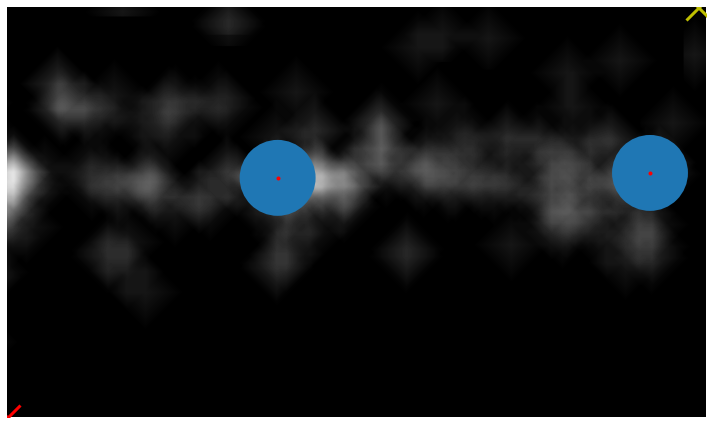

In [15]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.imshow(data, cmap=plt.cm.gray)
ax.autoscale(False)
ax.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax.plot(x1, y1, 'yx', markersize=25, markeredgewidth=3)
ax.plot(x2, y2, 'rx', markersize=25, markeredgewidth=3)


ax.axis('off')

for y, x in coordinates:
    circ = Circle((x, y), 100)
    ax.add_patch(circ)

fig.tight_layout()

plt.show()